#Calculation fo Survival Fraction
- Alpha beta values can be gathered from literature
- Will vary dose per fraction based on either a mean dose difference, or different dose each day


From the LQ-Model:
$$P(Survival) = exp(-\alpha D - \beta D^2)$$

and including a time proliferation factor:
$$P(Survival) = exp(-\alpha D - \beta D^2 + \lambda (T-T_k))$$
$$P(Survival) = exp(-\alpha D - \beta D^2) \cdot exp( + \lambda (T-T_k))$$

The time factor component can be separated out, and contains no funciton of dose, therefore will not affect the relative ratio of Survival fractions calcualted.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# qt if want plots in seperate window

###Standard Survival Fraction Calc
Note: This will need to be turned into different fractions...

In [2]:
alpha = 0.15 # define alpha beta values assumed - this will come from literature
alphabeta = 3
beta = alpha/alphabeta

###Plot if dose was given in a *Single Fraction*

In [3]:
Dose = np.arange(0,101,1) #set of doses 0-100 in 1Gy intervals

In [4]:
SF = np.exp(-alpha*Dose - beta*Dose**2)
SF098 = np.exp(-alpha*(Dose*0.98) - beta*(Dose*0.98)**2) # if 98% of dose is delivered

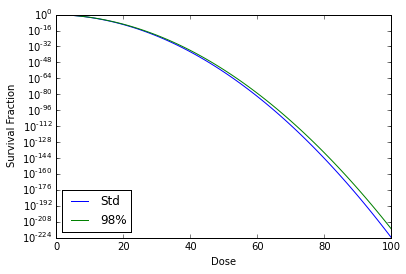

In [5]:
plt.semilogy(Dose,SF, label='Std')
plt.semilogy(Dose,SF098, label='98%')
plt.ylabel('Survival Fraction')
plt.xlabel('Dose')
plt.legend(loc='lower left')

### Fractionated RT

In [6]:
NoFrac = np.arange(0,51,1) # number of fractions
DoseFrac = 2 # dose per fraction
Dtot = NoFrac * DoseFrac # total dose

In [7]:
SFn = (np.exp(-(alpha*DoseFrac)-(beta*(DoseFrac**2))))**NoFrac

###Plot of fractionated SF 
 - Straight line as only plotting the individual point after each fraction

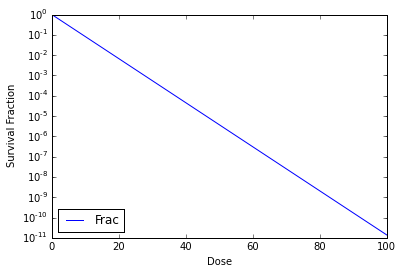

In [8]:
plt.semilogy(Dtot,SFn, label='Frac')
plt.ylabel('Survival Fraction')
plt.xlabel('Dose')
#plt.xlim(0,10)
#plt.ylim(1E-5,1)
plt.legend(loc='lower left')

###Plot comparison of single vs fractionated doses
- Note that 100Gy single fraction results in almost no SF, hence reduced axis ranges

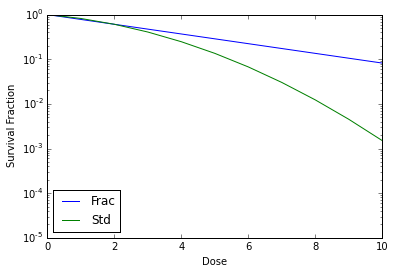

In [9]:
plt.semilogy(Dtot,SFn, label='Frac')
plt.semilogy(Dose,SF, label='Std')
plt.ylabel('Survival Fraction')
plt.xlabel('Dose')
plt.xlim(0,10)
plt.ylim(1E-5,1)
plt.legend(loc='lower left')

###Now for varying dose per fraction
- Have a mean shift, and a standard deviation to get results from?
- Start with just a min and max allowed range

1. Array with number of fractions
2. Array with delivered dose per fraction
    - This will be a calcualted distribution based on the OP data collected.
    - e.g. mean shift of -1%, with a range of +/-0.5% to give a range of doses -1.5 to -0.5%
3. Use these doses to calculate the SF as we go along using adjusted (due to varying fraction size) equation from above:
$$SF_{var} = SF_{n-1} \cdot [exp(-\alpha d - \beta d^2)]$$
4. Calcualte ratio of *Standard* and *Adjusted* SFs
$$SF_n = [exp(-\alpha d - \beta d^2)]^n$$

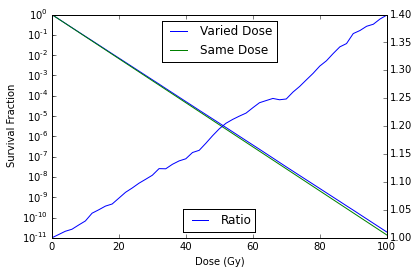

In [10]:
# 1. Array of number of fractions

NoFrac = np.arange(0,51,1)

# 2. Array with delivered dose per fraction
## Normal distribution around a mean with a SD (Make sure convert dose shift to Gy form %)

shift_mean = -2.0
shift_sd = 1.0

## WARNING - these calcualted dose shifts are incorrect.
## They ahve been corrected in another cell.
## This was preliminary work to prove the concept af applying a dose shift.

dose_shift=np.random.normal(loc = shift_mean/100, scale = shift_sd/100, size=len(NoFrac)-1) # normal distribution of numbers. loc = mean, scale = SD, size = array shape

dose_nominal = 2
dose_actual = dose_nominal + dose_shift # Delievered dose = nominal dose + dose shift

# 3. Calculate SF as it goes along

# calculate SF assuming constant dose/frac
SFn = (np.exp(-(alpha*DoseFrac)-(beta*(DoseFrac**2))))**NoFrac

# calculate varied SF based on random dose/frac (dose_actual)
# SF calcualted after each fraction and added to array which starts with SF=1 at Dose=0 
SFvar = np.array([1])
for i in range (0, len(NoFrac)-1):
    SFvar = np.append(SFvar,[SFvar[-1]*(np.exp(-(alpha*dose_actual[i])-(beta*(dose_actual[i]**2))))])
    
# 4. Calculate ratio between standard and varied doses to plot on right hand axis (Varied/Same dose)
SFratio = SFvar/SFn

# plot results
plt.semilogy(NoFrac*DoseFrac,SFvar, label='Varied Dose') # convert number of fractions to expected dose
plt.semilogy(Dtot,SFn, label='Same Dose')
plt.legend(loc = 'upper center')
plt.ylabel('Survival Fraction')
plt.xlabel('Dose (Gy)')
plt2 = plt.twinx()
plt2.plot(NoFrac*DoseFrac, SFratio, label='Ratio')
plt2.legend(loc='lower center')

50


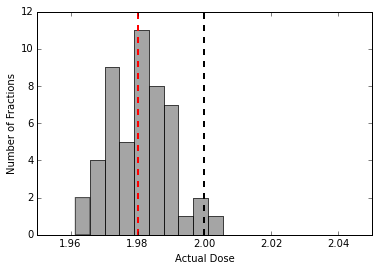

In [19]:
plt.hist(dose_actual, alpha = 0.7, color='grey')
plt.xlim(1.95, 2.05)
plt.axvline(2, ls='--', color='black', linewidth = 2)
plt.axvline(1.98, ls='--', color='red', linewidth = 2)
plt.xlabel('Actual Dose')
plt.ylabel('Number of Fractions')
print(len(dose_actual))

#plt.savefig('NPL_Paper_Plots/FinalData/SF-doseshifthist.png', bbox_inches='tight', dpi=300)


###So Far...
- Have calculated Survival fractoin based on:
    - Constant dose per fraction
    - Varied dose per fractoin based on a mean shift and normally distributed variation (specifying SD)

###Number of Cells remaining
- Calculate number of cancer cells remaining assuming an initial number.
- Then turn it into a **function** which accepts: Number of fractions, dose per fraction, alpha, alpha beta ratio.
    - This would then produce the graph and the ratio at end of treatment (final value in ratio array)
    - A function means can just copy into any python module created, or have it as a seperate module to refer to

### Alpha, Beta and Ratio calculator Function
Calculates the missing parameter based on the other 2 submitted

In [20]:
def alphabetacalc(alpha = None, beta = None, alphabeta = None):
    
    #if no parameters are entered
    if alpha == None and beta == None and alphabeta == None:
        print('** WARNING - No parameters entered, therefore cannot calculate')
        
    #if any parameters are negative
    if alpha != None and alpha < 0:
        print('** WARNING - Entered Alpha was negative')
    
        #if any parameters are negative
    if beta != None and beta < 0:
        print('** WARNING - Entered Beta was negative')

        #if any parameters are negative
    if alphabeta != None and alphabeta < 0:
        print('** WARNING - Entered Alpha/Beta was negative')

    #if all parameters are entered
    if alpha != None and beta != None and alphabeta != None:
        if abs(alpha/beta - alphabeta) > 0.01:
            print('** WARNING - 3 parameters were entered which do not mathematically match')

        #else:
        #    print('All parameters provided and match closely')

    #if alpha and beta are entered
    if alpha != None and beta !=None and alphabeta == None:
        #print('alpha and beta entered')
        alphabeta = alpha/beta

    #if beta and alphabeta are entered
    if alpha == None and beta !=None and alphabeta != None:
        #print('beta and alphabeta entered')
        alpha = beta*alphabeta

    #if alpha and alphabeta are entered
    if alpha != None and beta == None and alphabeta != None:
        #print('alpha and alphabeta entered')
        beta = alpha/alphabeta
        
    #print('Alpha: ' + str(alpha))
    #print('Beta: ' + str(beta))
    #print('Alpha/Beta: ' + str(alphabeta))
    
    return alpha, beta, alphabeta

# seems like quite a long function to do a simple calc... but it does work in all cases so far :)

###SF calculator function based on dose/# alpha and alpha/beta submitted
alpha and alph/beta can be calculated with seperate function if not known

In [21]:
## Function to calculate the SF based on input
def SFcalc(dose_per_fraction = None, alpha_beta_ratio = None, alpha = None):
    beta = alpha/alpha_beta_ratio
    x = np.exp(-(alpha*dose_per_fraction)-(beta*(dose_per_fraction**2)))
    return x

## Function to return number of cells remaining and print some results.
Enter dose shift and alpha beta ratios and dose per fraction.

In [42]:
## Function to calculate SF and number of cells remaining with different input values for NO #'s and alpha beta etc

def NoCellsRemaining(NoFrac = None, doseperfrac = None, alphabetaratio = None,
                     alpha = None, beta = None, dose_shift_mean = -2, dose_sd = 0.5, N0 = 1E9):

    ##### use function to get alpha beta values...?
    a,b,ab = alphabetacalc(alpha=alpha, alphabeta=alphabetaratio, beta = beta)

    Alpha = a
    beta = b
    alphabeta = ab
    ######
    
    #Set up initial starting values (contain defaults)
    #N0 = 1E8 # intial number of clonogens
    Nsf = [N0] # array which will contain number of cells remaining after each fraction. Start with N0
    
    #NoFrac = 50
    NoFracArr = np.arange(0,NoFrac+1,1) # array containing each fraction specified

    #alphabeta = 3 # submit to function
    #alpha = 0.1 # submit to function
    #beta = alpha/alphabeta

    #doseperfrac = 2 # nominal dose per fraction
    #dose_shift_mean = -2.0 # mean shift of dose in percent
    #dose_sd = 1 # standard deviation in delivered doses (to give normal distribution)

    
### If this is put in a for loop then could get many plots/repats on a single graph?

    dose_shift = np.random.normal(loc = dose_shift_mean/100, scale = dose_sd/100, size=len(NoFracArr)-1) # normal dist of shifted doses
    #print('dose shift: ' + str(np.mean(dose_shift)))
    dose_actual = doseperfrac + (doseperfrac*dose_shift)
    #print('dose mean: ' + str(np.mean(dose_actual)))
    dose_actual_mean = doseperfrac * (1 + (dose_shift_mean/100))
    #print('dose actual mean: ' + str(np.mean(dose_actual_mean)))
    
    SFnom = (np.exp(-(alpha*doseperfrac)-(beta*(doseperfrac**2))))**NoFracArr # this SF based on nominal dose
    SF_mean_shift = (np.exp(-(alpha*dose_actual_mean)-(beta*(dose_actual_mean**2))))**NoFracArr # this SF based on nominal dose

    SFvar = np.array([1]) # set initial survival fraction = 1 after zero dose

    for i in range(0,len(NoFracArr)-1):
        SF = SFcalc(dose_actual[i], alpha_beta_ratio=alphabeta, alpha=alpha) # use SF function
        SFvar = np.append(SFvar,[SFvar[-1]*SF])

    N_SFvar = N0*SFvar
    N_SFnom = N0*SFnom
    N_SF_mean_shift = N0*SF_mean_shift
    N_dif = N_SFnom - N_SFvar

    SFratio = SFvar/SFnom
    SFratio_mean_shift = SF_mean_shift/SFnom
    #print('')
    #print('N0: ' + str("{:.1e}".format(N0)) + ' cells')
    
    #"{0:.0f}".format(N_dif[-1]
    
    #print('No #s: ' + str(NoFrac))
    #print('Nominal Dose/#: ' + str(doseperfrac) + 'Gy')
    #print('Dose shift (mean): ' + str(dose_shift_mean) + '%')
    #print('Dose variation (SD): ' + str(dose_sd) + '%')
    #print('')
    #print('Nominal SF: ' + str(SFnom[-1]))
    #print('Varied Dose SF: ' + str(SFvar[-1]))
    #print('Mean Dose SF: ' + str(SF_mean_shift[-1]))
    #print("{0:.1f}".format(N_SFvar[-1]) + ' cells remain if dose varies')
    #print("{0:.1f}".format(N_SFnom[-1]) + ' cells remain for nominal dose')
    #print('')

    #if N_SFvar[-1] > N_SFnom[-1]:
    #    print('An extra ' + "{0:.1f}".format(-N_dif[-1]) + ' cells remain with varied dose')
    #else:
    #    print("{0:.0f}".format(N_dif[-1]) + ' fewer cells remain with varied dose')

    #print('SF Ratio: ' + "{0:.2f}".format(SFratio[-1]))
    #print('SF Ratio (mean): ' + "{0:.2f}".format(SFratio_mean_shift[-1]))

    ## Plot of results
    #plt.semilogy(NoFracArr, SFnom, label = 'Nominal Dose: ' + str(doseperfrac) + 'Gy/#')
    #plt.semilogy(NoFracArr, SFvar, label = 'Varied Dose: \nMean shift = ' + str(dose_shift_mean) + '% , \nSD = ' + str(dose_sd) + '%')
    #plt.ylim(1e-6,1)
    #plt.xlabel('No. Fractions')
    #plt.ylabel('Survival Fraction')
    #plt.legend(loc='upper center',prop={'size':9})
    ##plt.semilogy(NoFracArr, Nsf)
    #plt2 = plt.twinx()
    #plt2.plot(NoFracArr,SFratio, label = 'SF Ratio', color='red')
    #plt2.plot(NoFracArr,SFratio_mean_shift, label = 'SF Ratio (mean shift)', color='red', ls='--')
    #plt.legend(loc='lower center')

    return SFnom[:], SFvar[:], SF_mean_shift[-1], N_dif[-1], NoFracArr, SFratio, SFratio_mean_shift
    

In [122]:
import time
t0 = time.time()

all_patients=np.empty(shape=0)
    
test=[]
for i in range(0,12):
    test=np.append(test,np.mod(i,4)+1)

test2 = np.reshape(test,[3,-1])

n_pts = 10000

num_frac = 37
num_frac_arr = np.arange(0,num_frac+1,1)
DperF = 2.0 # dose in Gy
DoseArray = num_frac_arr*DperF

shift_dose_mean = -1.0
shift_dose_sd = 1.0

#progressbar
pb = FloatProgress(min=0, max=1)
display(pb)

for i in range(0,n_pts):
    a,b,c,d,e,f,g = NoCellsRemaining(NoFrac=num_frac, doseperfrac=DperF, dose_shift_mean = shift_dose_mean, dose_sd = shift_dose_sd, alpha=0.1, alphabetaratio=3.0, N0=1E9)
    all_patients = np.append(all_patients,f) # collate Svar for each iteration
    pb.value = (i+1)/n_pts

all_patients=np.reshape(all_patients, (n_pts,-1))

# a = SFnom
# b = SFvar
# c = SF_mean_shift
# d= N_dif

t1 = time.time()
total = t1-t0
print('Time taken: ' + "{0:.2f}".format(total))
print(str(n_pts) + ' patients')
#print(b)
#print(all_patients)

## Plot of results - see next cell for improved version.
#plt.semilogy(DoseArray, a, label = 'Nominal Dose: ' + str(DperF) + 'Gy/#')
#plt.semilogy(DoseArray, b, label = 'Varied Dose: \nMean shift = ' + str(shift_dose_mean) + '% , \nSD = ' + str(shift_dose_sd) + '%')
#plt.ylim(1e-6,1)
#plt.xlabel('No. Fractions')
#plt.ylabel('Survival Fraction')
#plt.legend(loc='upper center',prop={'size':9})
##plt.semilogy(NoFracArr, Nsf)
#plt2 = plt.twinx()
#plt2.plot(DoseArray,f, label = 'SF Ratio', color='red')
#plt2.plot(DoseArray,g, label = 'SF Ratio (mean shift)', color='red', ls='--')
#plt.legend(loc='lower center')


Time taken: 21.10
10000 patients


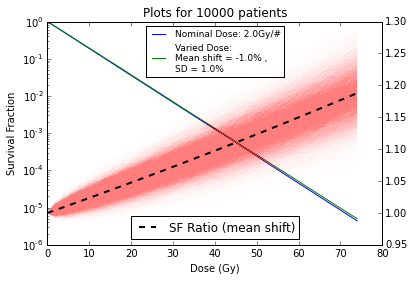

In [125]:
## Plot of results
plt.semilogy(DoseArray, a, label = 'Nominal Dose: ' + str(DperF) + 'Gy/#')
plt.semilogy(DoseArray, b, label = 'Varied Dose: \nMean shift = ' + str(shift_dose_mean) + '% , \nSD = ' + str(shift_dose_sd) + '%')
plt.ylim(1e-6,1)
plt.xlim(0,100)
plt.xlabel('Dose (Gy)')
plt.ylabel('Survival Fraction')
plt.legend(loc='upper center',prop={'size':9})
##plt.semilogy(NoFracArr, Nsf)
plt2 = plt.twinx()
plt2.set_ylim(0.95,1.3)

pb = FloatProgress(min=0, max=1)
display(pb)

pltpoints = n_pts # number of patients to plot - set to a number if don't want to plot them all
#plt2.plot(DoseArray,g, label = 'SF Ratio (mean shift)', color='black', ls='--', linewidth = 2)
plt.title('Plots for ' + str(n_pts) + ' patients')
for i in range(0,pltpoints):
    plt2.plot(DoseArray,all_patients[i], color='red', alpha=0.01)
    #plt.savefig('NPL_Paper_Plots/FinalData/SF-each_patient' + str(i) + '.png', bbox_inches='tight', dpi=300)
    pb.value = (i+1)/pltpoints
    
plt2.plot(DoseArray,g, label = 'SF Ratio (mean shift)', color='black', ls='--', linewidth = 2)
plt.legend(loc='lower center')

#plt.savefig('NPL_Paper_Plots/FinalData/SF-each_patient-ALL100.png', bbox_inches='tight', dpi=300)


(6.936488564180082, 0.03117171137700708)

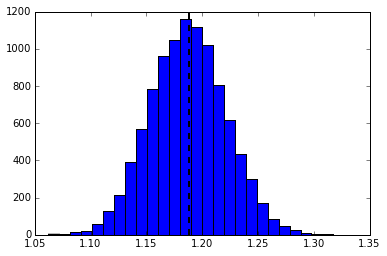

In [161]:
## Plot of final SF values to show that it is normally distributed.
final_SF = np.copy(all_patients[:,-1]) # final SF for all patients
plt.hist(final_SF, bins=27)
plt.axvline(g[-1], color = 'black', ls = '--', linewidth = 2)
from scipy import stats
stats.normaltest(final_SF)



Some references for alpha/beta:
- Radiotherapy and Oncology 100 (2011) 282–288
    - ALphabeta = 2.88, alpha = 0.08
- FAST
    - Alphabeta = 2.5

## Adapt for iterating a number of times
- Plotting and printing withint he function has been removed.
- **Need to return each array of SF after each iteration so can plot all on a single graph.

In [47]:
## Function to calculate SF and number of cells remaining with different input values for NO #'s and alpha beta etc

def NoCellsRemainingNoPlot(NoFrac = None, doseperfrac = None, alphabetaratio = None,
                     alpha = None, beta = None, dose_shift_mean = -2, dose_sd = 0.5, N0 = 1E9):

    ##### use function to get alpha beta values...?
    a,b,ab = alphabetacalc(alpha=alpha, alphabeta=alphabetaratio, beta = beta)

    Alpha = a
    beta = b
    alphabeta = ab
    ######
    
    #Set up initial starting values (contain defaults)
    #N0 = 1E8 # intial number of clonogens
    Nsf = [N0] # array which will contain number of cells remaining after each fraction. Start with N0
    
    #NoFrac = 50
    NoFracArr = np.arange(0,NoFrac+1,1) # array containing each fraction specified

    #alphabeta = 3 # submit to function
    #alpha = 0.1 # submit to function
    #beta = alpha/alphabeta

    #doseperfrac = 2 # nominal dose per fraction
    #dose_shift_mean = -2.0 # mean shift of dose in percent
    #dose_sd = 1 # standard deviation in delivered doses (to give normal distribution)

    
### If this is put in a for loop then could get many plots/repats on a single graph?

    dose_shift = np.random.normal(loc = dose_shift_mean/100, scale = dose_sd/100, size=len(NoFracArr)-1) # normal dist of shifted doses
    #print('dose shift: ' + str(np.mean(dose_shift)))
    dose_actual = doseperfrac + (doseperfrac*dose_shift)
    #print('dose mean: ' + str(np.mean(dose_actual)))
    dose_actual_mean = doseperfrac * (1 + (dose_shift_mean/100))
    #print('dose actual mean: ' + str(np.mean(dose_actual_mean)))

    SFnom = (np.exp(-(alpha*doseperfrac)-(beta*(doseperfrac**2))))**NoFracArr # this SF based on nominal dose
    SF_mean_shift = (np.exp(-(alpha*dose_actual_mean)-(beta*(dose_actual_mean**2))))**NoFracArr # this SF based on nominal dose

    SFvar = np.array([1]) # set initial survival fraction = 1 after zero dose

    for i in range(0,len(NoFracArr)-1):
        SF = SFcalc(dose_actual[i], alpha_beta_ratio=alphabeta, alpha=alpha) # use SF function
        SFvar = np.append(SFvar,[SFvar[-1]*SF])

    N_SFvar = N0*SFvar
    N_SFnom = N0*SFnom
    N_SF_mean_shift = N0*SF_mean_shift
    N_dif = N_SFnom - N_SFvar

    SFratio = SFvar/SFnom
    SFratio_mean_shift = SF_mean_shift/SFnom
    #print('')
    #print('N0: ' + str("{:.1e}".format(N0)) + ' cells')
    
    #"{0:.0f}".format(N_dif[-1]
    
    #print('No #s: ' + str(NoFrac))
    #print('Nominal Dose/#: ' + str(doseperfrac) + 'Gy')
    #print('Dose shift (mean): ' + str(dose_shift_mean) + '%')
    #print('Dose variation (SD): ' + str(dose_sd) + '%')
    #print('')
    #print('Nominal SF: ' + str(SFnom[-1]))
    #print('Varied Dose SF: ' + str(SFvar[-1]))
    #print('Mean Dose SF: ' + str(SF_mean_shift[-1]))
    #print("{0:.1f}".format(N_SFvar[-1]) + ' cells remain if dose varies')
    #print("{0:.1f}".format(N_SFnom[-1]) + ' cells remain for nominal dose')
    #print('')

    #if N_SFvar[-1] > N_SFnom[-1]:
        #print('An extra ' + "{0:.1f}".format(-N_dif[-1]) + ' cells remain with varied dose')
    #else:
        #print("{0:.0f}".format(N_dif[-1]) + ' fewer cells remain with varied dose')

    #print('SF Ratio: ' + "{0:.2f}".format(SFratio[-1]))
    #print('SF Ratio (mean): ' + "{0:.2f}".format(SFratio_mean_shift[-1]))

    # Plot of results
    #plt.semilogy(NoFracArr, SFnom, label = 'Nominal Dose: ' + str(doseperfrac) + 'Gy/#')
    #plt.semilogy(NoFracArr, SFvar, label = 'Varied Dose: \nMean shift = ' + str(dose_shift_mean) + '% , \nSD = ' + str(dose_sd) + '%')
    #plt.ylim(1e-6,1)
    #plt.xlabel('No. Fractions')
    #plt.ylabel('Survival Fraction')
    #plt.legend(loc='upper center',prop={'size':9})
    #plt.semilogy(NoFracArr, Nsf)
    #plt2 = plt.twinx()
    #plt2.plot(NoFracArr,SFratio, label = 'SF Ratio', color='red')
    #plt2.plot(NoFracArr,SFratio_mean_shift, label = 'SF Ratio (mean shift)', color='red', ls='--')
    #plt.legend(loc='lower center')

    return SFnom[-1], SFvar[-1], SF_mean_shift[-1], N_dif[-1]

##Repeat SF calc multiple times
- Take the mean result of all iterations.
- Calc percentage difference to mean and plot.
- Can see it tends towards the mean with many iterations (patients)

In [48]:
# need to stop the plots and just get the result arrays to then plot afterwards.
# have removed the plots and printing components from the NoCells... funcitona dnthe alphabeta function

from IPython.html.widgets import FloatProgress
from IPython.display import display
from time import sleep

#progressbar
f = FloatProgress(min=0, max=1)
display(f)

import time

b_all_1=[]
b_all_10=[]
b_all_100=[]
b_all_1000=[]
#b_all_10000=[]
#b_all_100000=[]

dose_shift_mean_test = -2.0
dose_sd_test = 2.0
alpha_test = 0.1
alphabetaratio_test = 3.0
NoFrac_test = 37
doseperfrac_test = 2.0
N0_test = 1E9

testarray=np.empty(shape=0)

n_its = 100

for j in range(1,n_its+1):

    t0 = time.time()

    for i in range(1):
        a,b,c,d = NoCellsRemainingNoPlot(NoFrac=NoFrac_test, doseperfrac=doseperfrac_test, dose_shift_mean = dose_shift_mean_test,
                                         dose_sd = dose_sd_test, alpha=alpha_test, alphabetaratio=alphabetaratio_test, N0=N0_test)
        b_all_1 = np.append(b_all_1,b)
        #f.value = (i+1)/1
    t1 = time.time()

    for i in range(10):
        a,b,c,d = NoCellsRemainingNoPlot(NoFrac=NoFrac_test, doseperfrac=doseperfrac_test, dose_shift_mean = dose_shift_mean_test,
                                         dose_sd = dose_sd_test, alpha=alpha_test, alphabetaratio=alphabetaratio_test, N0=N0_test)
        b_all_10 = np.append(b_all_10,b)
        #f.value = (i+1)/10
    t10 = time.time()

    for i in range(100):
        a,b,c,d = NoCellsRemainingNoPlot(NoFrac=NoFrac_test, doseperfrac=doseperfrac_test, dose_shift_mean = dose_shift_mean_test,
                                         dose_sd = dose_sd_test, alpha=alpha_test, alphabetaratio=alphabetaratio_test, N0=N0_test)
        b_all_100 = np.append(b_all_100,b)
        #f.value = (i+1)/100
    t100 = time.time()   

    for i in range(1000):
        a,b,c,d = NoCellsRemainingNoPlot(NoFrac=NoFrac_test, doseperfrac=doseperfrac_test, dose_shift_mean = dose_shift_mean_test,
                                         dose_sd = dose_sd_test, alpha=alpha_test, alphabetaratio=alphabetaratio_test, N0=N0_test)
        b_all_1000= np.append(b_all_1000,b)
        test_col = 'warning'
        #f.value = (i+1)/1000
    t1000 = time.time()

    #for i in range(10000):
    #    a,b,c,d = NoCellsRemainingNoPlot(NoFrac=NoFrac_test, doseperfrac=doseperfrac_test, dose_shift_mean = dose_shift_mean_test,
    #                                     dose_sd = dose_sd_test, alpha=alpha_test, alphabetaratio=alphabetaratio_test, N0=N0_test)
    #    b_all_10000 = np.append(b_all_10000,b)
    #    f.value = (i+1)/10000
    #t10000 = time.time()

    #for i in range(100000):
    #    a,b,c,d = NoCellsRemainingNoPlot(NoFrac=NoFrac_test, doseperfrac=doseperfrac_test, dose_shift_mean = dose_shift_mean_test,
    #                                     dose_sd = dose_sd_test, alpha=alpha_test, alphabetaratio=alphabetaratio_test, N0=N0_test)
    #    b_all_100000 = np.append(b_all_100000,b)
    #    f.value = (i+1)/100000
    #t100000 = time.time()

    dif1 = t1-t0
    dif10 = t10-t1
    dif100 = t100-t10
    dif1000 = t1000-t100
    #dif10000 = t10000-t1000
    #dif100000 = t100000-t10000
    
    testarray=np.append(testarray,[np.mean(b_all_1),np.mean(b_all_10),np.mean(b_all_100),np.mean(b_all_1000)])
    
    f.value = (j)/n_its

print('mean shift: ' + str(c))
print('1 iteration: ' + str(np.mean(b_all_1)))
print('10 iterations: ' + str(np.mean(b_all_10)))
print('100 iterations: ' + str(np.mean(b_all_100)))
print('1000 iterations: ' + str(np.mean(b_all_1000)))
#print('10000 iterations: ' + str(np.mean(b_all_10000)))
#print('100000 iterations: ' + str(np.mean(b_all_100000)))
print()
print('Time taken for 1: ' + "{0:.2f}".format(dif1) + ' secs')
print('Time taken for 10: ' + "{0:.2f}".format(dif10) + ' secs')
print('Time taken for 100: ' + "{0:.2f}".format(dif100) + ' secs')
print('Time taken for 1000: ' + "{0:.2f}".format(dif1000) + ' secs')
#print('Time taken for 10000: ' + "{0:.2f}".format(dif10000) + ' secs')
#print('Time taken for 100000: ' + "{0:.2f}".format(dif100000) + ' secs')

#x=np.array([1,10,100,1000,10000,100000])
#y = np.array([np.mean(b_all_1),np.mean(b_all_10),np.mean(b_all_100),np.mean(b_all_1000),np.mean(b_all_10000),np.mean(b_all_100000)])

x=np.array([1,10,100,1000])
y = np.array([np.mean(b_all_1),np.mean(b_all_10),np.mean(b_all_100),np.mean(b_all_1000)])

test_shaped = testarray.reshape(n_its,-1)
#print(test_shaped)

# a = SFnom
# b = SFvar
# c = SF_mean_shift
# d= N_dif

KeyboardInterrupt: 

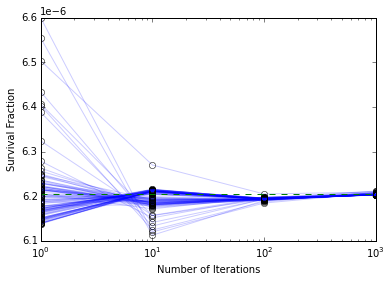

In [35]:
#Plot the results 

import matplotlib.ticker as mtick

for i in range(0,n_its):
    plt.semilogx(x,test_shaped[i], marker='o', markerfacecolor='none', label = 'SF', color='blue', alpha=0.2)
plt.axhline(c,color='green', ls='--')
plt.xlabel('Number of Iterations')
plt.ylabel('Survival Fraction')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.ylim(6.1e-6,6.3e-6)

#plt.savefig('NPL_Paper_Plots/FinalData/SF-towards-mean-100repeats.png', bbox_inches='tight', dpi=300)

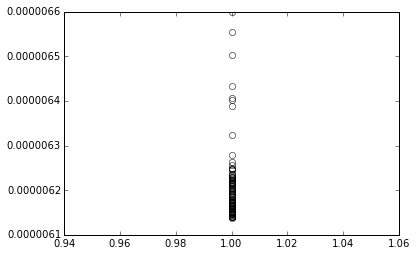

In [39]:
for i in range(0,n_its):
    plt.plot(x[0],test_shaped[i][0], marker='o', markerfacecolor='none', label = 'SF', color='blue', alpha=0.2)

In [28]:
# loops within loops to buildup array of results

test=np.empty(shape=0)
    
for i in range(0,12):
    test=np.append(test,np.mod(i,4)+1)

print(test)
test2 = np.reshape(test,[3,-1])
print(test2)

[ 1.  2.  3.  4.  1.  2.  3.  4.  1.  2.  3.  4.]
[[ 1.  2.  3.  4.]
 [ 1.  2.  3.  4.]
 [ 1.  2.  3.  4.]]


##Difference in SF compared with mean dose deviation
####It can be seen that with a large number of results (patients) the variation in daily dose tends to drift towards the mean.
- It would be interesting still to determine the variation for individual patients
- this is important as only a limited number of fractions are used, not thousands for each patient

Individual patient variations could be done by getting the SF for each iteration and storing it in an array
These could then be plotted on the same plot - or get a histogram of the final SF

In [ ]:
# add a percentage difference and plot on opposite axis
sf_mean_dif_perc = ((y/c)-1)*100

plt.semilogx(x,sf_mean_dif_perc, label = '% Dif', color='blue', marker='o', markerfacecolor='none')
plt.axhline(c,color='green', ls='--')
plt.xlabel('Number of Iterations')
plt.ylabel('Difference between mean SF \n and Varied dose SF (%)')
plt.grid(color='grey', linestyle='-', alpha = 0.5)

In [ ]:
## Progress bar widget
from IPython.html.widgets import FloatProgress
from IPython.display import display
from time import sleep
f = FloatProgress(min=0, max=9)
display(f)

range_end=10

for i in range(range_end):
    sleep(0.1)
    f.value = i

f = FloatProgress(min=0, max=range_end, bar_style='success')
display(f)
f.value = range_end

In [ ]:
f = FloatProgress(min=0, max=9, bar_style='success')
for i in range(10):
    sleep(0.1)
    f.value = i